# COMP2445 Data Mining Assignment 1

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [92]:
civitas_data = pd.read_csv("CivitasMotorsCustomers.csv", encoding="latin1")
civitas_data.head(11)

,Customer ID,First_Name,Last_Name,Street_Number,Street_Name,City,Country,Postcode,Phone,Age,Reg_Number,Car_Make,Car_Model,Reg_Year,Replacement_Cycle,Retail_Price,Purchase_Date
0,2,Leela,Marshland,4,Di Loreto,Worcester,United Kingdom,WR4,286-568-0312,84,FX29WRA,Ford,Expedition EL,2012,9,"£85,100.00",12/06/2020
1,2,Leela,Marshland,4,Di Loreto,Worcester,United Kingdom,WR4,286-568-0312,84,QP77KAX,Geo,Metro,1995,8,"£10,828.00",02/10/2019
2,2,Leela,Marshland,4,Di Loreto,Worcester,United Kingdom,WR4,286-568-0312,84,WC11IHS,Chevrolet,Suburban 2500,1997,9,"£44,671.00",11/02/2018
3,3,Wernher,Crennan,8,Mccormick,Worcester,United Kingdom,WR3,493-250-7052,23,CI00MUI,Saturn,Relay,2007,9,"£85,878.00",22/07/2020
4,4,Saundra,Iles,6673,Northwestern,Droitwich,United Kingdom,WR9,252-693-3776,54,AT25DRV,Dodge,Durango,2007,9,"£119,030.00",30/06/2020
5,5,Jory,O'Teague,7,Moose,Worcester,United Kingdom,WR2,322-897-9153,73,ZE42RXL,GMC,Yukon XL 2500,2009,5,"£102,790.00",28/10/2019
6,6,Vita,Pasley,58,Stoughton,Kidderminster,United Kingdom,DY10,358-697-4488,36,QC59OET,Saab,95,2007,5,"£71,584.00",19/12/2018
7,7,Kym,Stangroom,960,Schurz,Worcester,United Kingdom,WR2,447-574-4879,41,AL46HAB,Hyundai,Santa Fe,2011,3,"£13,480.00",30/04/2020
8,8,Adrienne,Whoston,67332,Manitowish,Upton upon Severn,United Kingdom,WR8,837-882-5122,22,GI65IMB,Mazda,626,1998,6,"£124,865.00",08/02/2019
9,8,Adrienne,Whoston,67332,Manitowish,Upton upon Severn,United Kingdom,WR8,837-882-5122,22,NI18KMB,Dodge,Ram 50,1992,Never,"£111,105.00",04/08/2020


# EDA

In [93]:
civitas_data.describe()

,Customer ID,Street_Number,Age,Reg_Year
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,1455.265000,11659.832500,53.860250,1999.926750
std,867.011627,24417.515077,20.903408,9.566518
min,2.000000,0.000000,18.000000,1909.000000
25%,696.000000,26.000000,35.000000,1994.000000
50%,1423.000000,468.000000,54.000000,2001.000000
75%,2200.750000,6962.250000,72.000000,2007.000000
max,3000.000000,99974.000000,90.000000,2013.000000


Using describe shows an overall review of the data.

In [94]:
# Return the total number of rows in the DataFrame
print(f"There are {civitas_data.shape[0]} rows in this dataframe.")

# Return the number of non-missing values for each column in the DataFrame
civitas_data.count()

There are 4000 rows in this dataframe.


Customer ID          4000
First_Name           4000
Last_Name            4000
Street_Number        4000
Street_Name          4000
City                 4000
Country              4000
Postcode             4000
Phone                4000
Age                  4000
Reg_Number           4000
Car_Make             4000
Car_Model            4000
Reg_Year             4000
Replacement_Cycle    4000
Retail_Price         4000
Purchase_Date        4000
dtype: int64

Given the use .shape[0] and .count() together effectively demonstrates there is no missing data. However, this does not account for non-numeric data in mostly numeric columns of data, such as Replacement_Cycle.

1. What are the most popular car makes among repeat customers?

In [95]:
# Check for duplicates based on 'Customer ID' to find repeat customers
repeat_customers = civitas_data[civitas_data.duplicated(subset='Customer ID', keep=False)]

# Count the occurrences of each car make to find the most popular ones
popular_makes = repeat_customers['Car_Make'].value_counts()

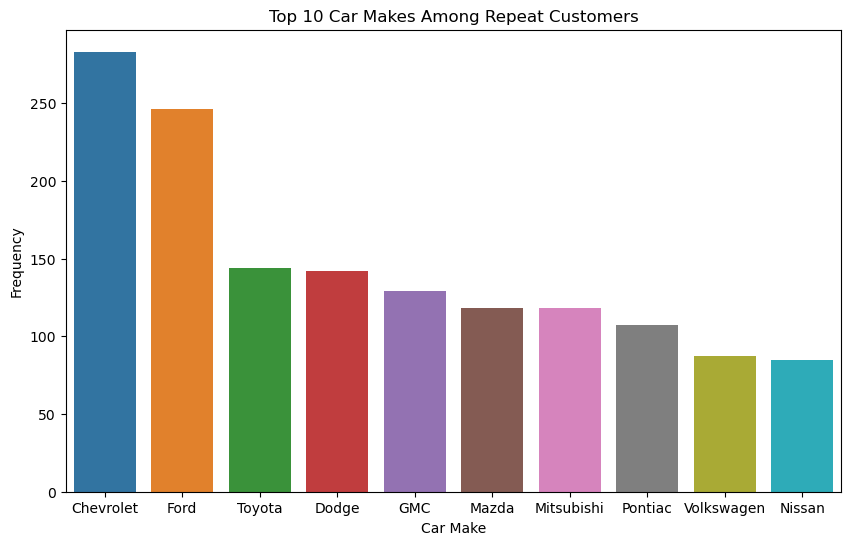

In [96]:
# Plot for top 10 car makes
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_makes.head(10).index, y=popular_makes.head(10).values)
plt.title('Top 10 Car Makes Among Repeat Customers')
plt.xlabel('Car Make')
plt.ylabel('Frequency')
plt.show()

2. Which cities or regions have the highest sales for Civitas Motors?

In [97]:
# Group the data by 'City' and count the number of sales for each city
sales_by_city = civitas_data.groupby('City').size().sort_values(ascending=False)

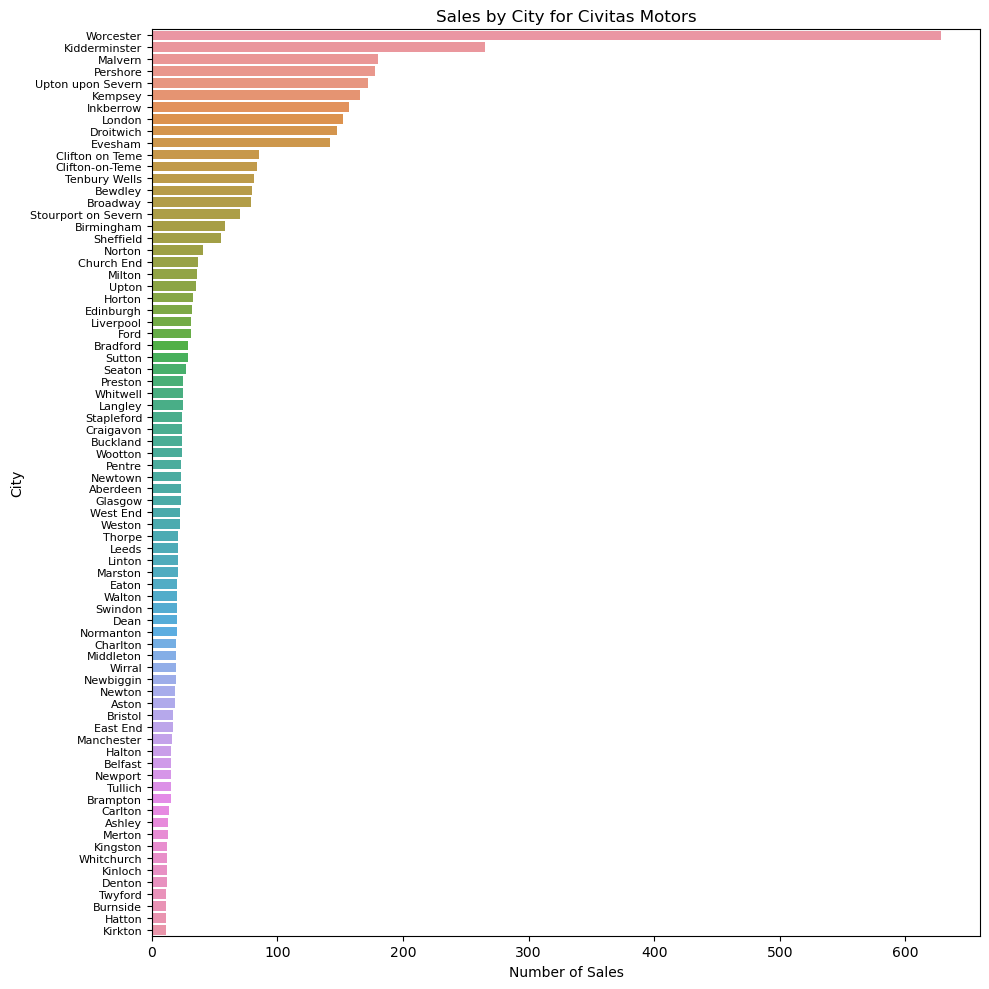

In [98]:
# Use a bar chart to visualize the cities with the highest sales
plt.figure(figsize=(10, 10))
sns.barplot(x=sales_by_city.values, y=sales_by_city.index)
plt.title('Sales by City for Civitas Motors')
plt.xlabel('Number of Sales')
plt.ylabel('City')
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

3. During which months are car sales the highest?

In [99]:
# Convert 'Purchase_Date' to datetime
Purchase_Dates = pd.to_datetime(civitas_data['Purchase_Date'], dayfirst=True, errors='coerce')

# Extract month from 'Purchase_Date'
civitas_data['Sale_Month'] = Purchase_Dates.dt.month

# Drop rows with NaT in 'Purchase_Date' which will have NaN in 'Sale_Month' after conversion
civitas_data = civitas_data.dropna(subset=['Sale_Month'])

# Ensure 'Sale_Month' is an integer
civitas_data['Sale_Month'] = civitas_data['Sale_Month'].astype(int)

# Group by month and count the sales
monthly_sales_count = civitas_data.groupby('Sale_Month').size()

# Sort the sales count to find the months with the highest sales
sorted_monthly_sales = monthly_sales_count.sort_values(ascending=False)

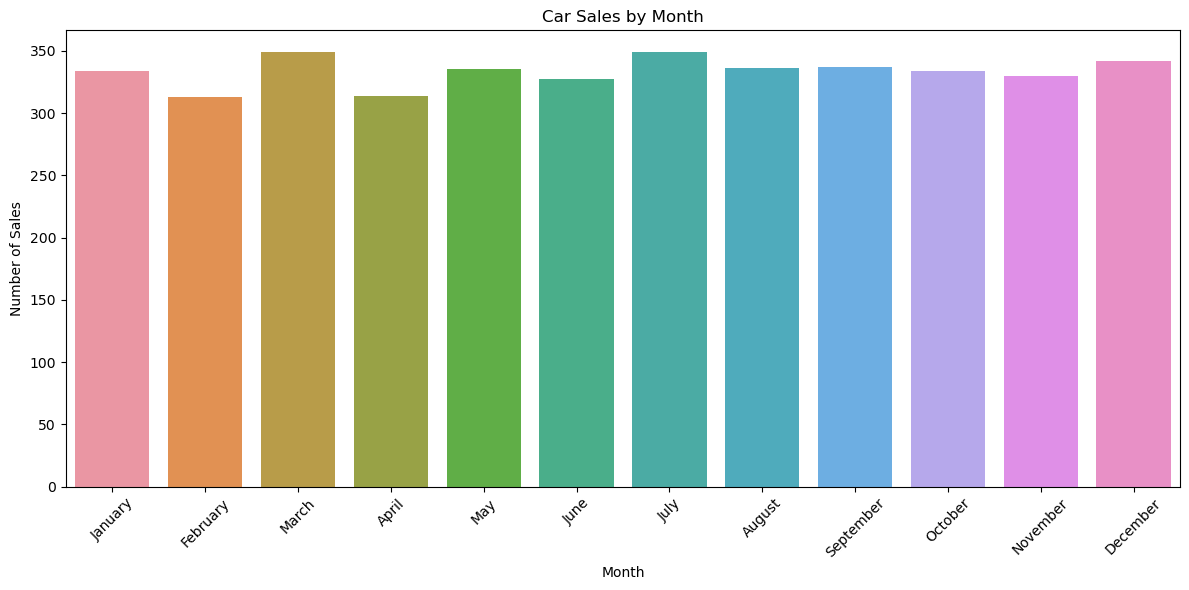

Sale_Month
3     349
7     349
12    342
9     337
8     336
5     335
1     334
10    334
11    330
6     327
4     314
2     313
dtype: int64

In [100]:
# Plot the sales count per month as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_monthly_sales.index, y=sorted_monthly_sales.values)
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(ticks=range(0, 12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
], rotation=45)
plt.tight_layout()
plt.show()

# Display the sorted sales count
sorted_monthly_sales

4. What are the most and least replaced car makes? 

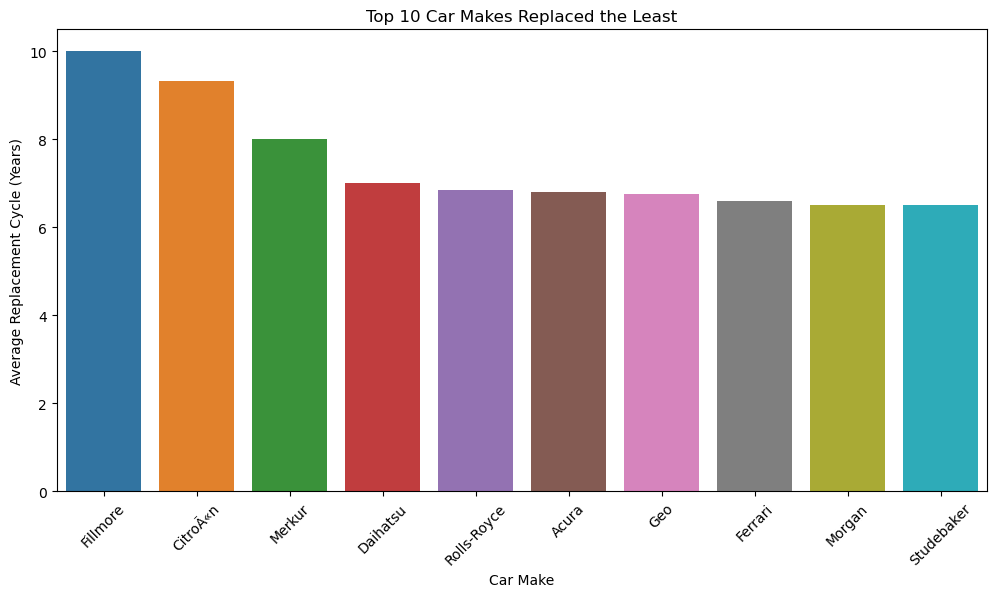

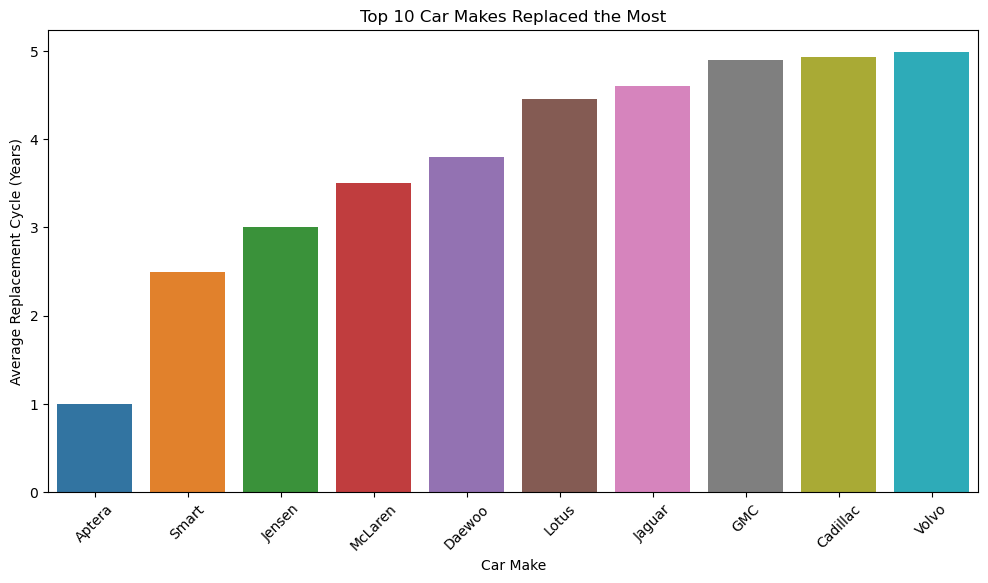

In [101]:
# Replace non-numeric values in 'Replacement_Cycle' with NaN and convert to float
civitas_data['Replacement_Cycle'] = pd.to_numeric(civitas_data['Replacement_Cycle'], errors='coerce')

# Group by 'Car_Make' and calculate the mean replacement cycle
replacement_cycle_by_make = civitas_data.groupby('Car_Make')['Replacement_Cycle'].mean()

# Sort and select top 10 for least and most replaced
top_10_least_replaced = replacement_cycle_by_make.nlargest(10)
top_10_most_replaced = replacement_cycle_by_make.nsmallest(10)

# Plotting for least replaced
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_least_replaced.index, y=top_10_least_replaced.values)
plt.xticks(rotation=45)
plt.title('Top 10 Car Makes Replaced the Least')
plt.xlabel('Car Make')
plt.ylabel('Average Replacement Cycle (Years)')
plt.show()

# Plotting for most replaced
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_most_replaced.index, y=top_10_most_replaced.values)
plt.xticks(rotation=45)
plt.title('Top 10 Car Makes Replaced the Most')
plt.xlabel('Car Make')
plt.ylabel('Average Replacement Cycle (Years)')
plt.show()

# Part 1 Analysis of customer base

1. What are the age ranges of their customers?

Remove duplicates to avoid count inflation of customers with more than one car:

In [102]:
# Remove duplicate entries based on 'Customer ID' to retain only unique customers
unique_customers = civitas_data.drop_duplicates(subset='Customer ID')

unique_customers.head(11)

,Customer ID,First_Name,Last_Name,Street_Number,Street_Name,City,Country,Postcode,Phone,Age,Reg_Number,Car_Make,Car_Model,Reg_Year,Replacement_Cycle,Retail_Price,Purchase_Date,Sale_Month
0,2,Leela,Marshland,4,Di Loreto,Worcester,United Kingdom,WR4,286-568-0312,84,FX29WRA,Ford,Expedition EL,2012,9.0,"£85,100.00",12/06/2020,6
3,3,Wernher,Crennan,8,Mccormick,Worcester,United Kingdom,WR3,493-250-7052,23,CI00MUI,Saturn,Relay,2007,9.0,"£85,878.00",22/07/2020,7
4,4,Saundra,Iles,6673,Northwestern,Droitwich,United Kingdom,WR9,252-693-3776,54,AT25DRV,Dodge,Durango,2007,9.0,"£119,030.00",30/06/2020,6
5,5,Jory,O'Teague,7,Moose,Worcester,United Kingdom,WR2,322-897-9153,73,ZE42RXL,GMC,Yukon XL 2500,2009,5.0,"£102,790.00",28/10/2019,10
6,6,Vita,Pasley,58,Stoughton,Kidderminster,United Kingdom,DY10,358-697-4488,36,QC59OET,Saab,95,2007,5.0,"£71,584.00",19/12/2018,12
7,7,Kym,Stangroom,960,Schurz,Worcester,United Kingdom,WR2,447-574-4879,41,AL46HAB,Hyundai,Santa Fe,2011,3.0,"£13,480.00",30/04/2020,4
8,8,Adrienne,Whoston,67332,Manitowish,Upton upon Severn,United Kingdom,WR8,837-882-5122,22,GI65IMB,Mazda,626,1998,6.0,"£124,865.00",08/02/2019,2
10,9,Debra,Keuning,6,Fair Oaks,Inkberrow,United Kingdom,WR7,309-135-7997,30,TD58HZI,Volkswagen,Jetta,2006,1.0,"£85,184.00",25/08/2019,8
11,11,Jerald,Blazdell,614,Trailsway,Droitwich,United Kingdom,WR9,361-592-8182,81,DB16BZX,Ford,F150,2009,5.0,"£48,748.00",13/01/2018,1
13,12,Zacherie,Schooley,369,Clarendon,Tenbury Wells,United Kingdom,WR15,224-167-5529,24,TJ29UBA,Mercury,Marauder,2004,9.0,"£22,925.00",28/01/2019,1


Plot histogram to show age distribution:

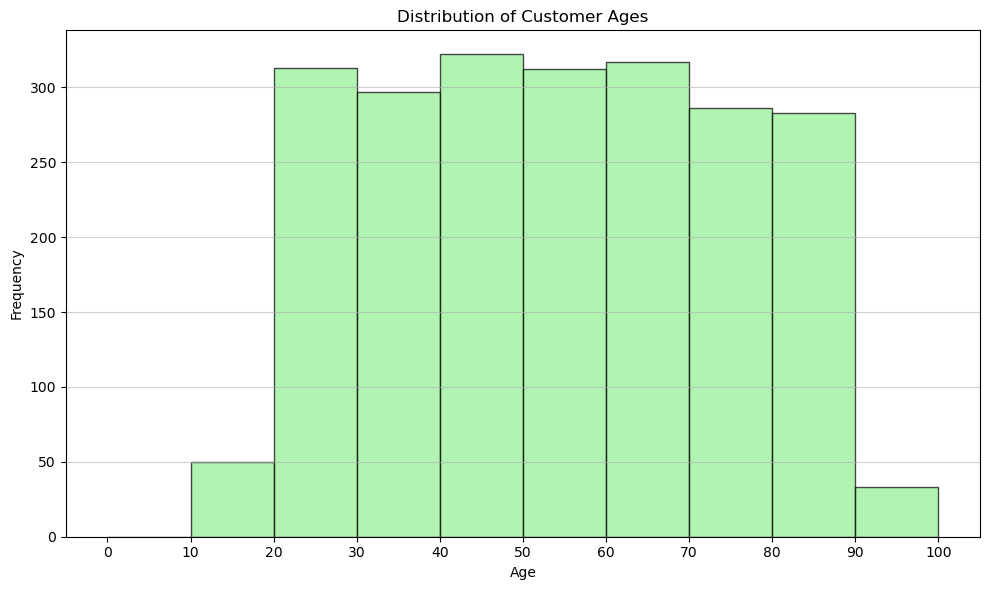

In [103]:
# Creates a new figure with a specific size (width: 10 units, height: 6 units)
plt.figure(figsize=(10, 6))

# Creates a histogram of customer ages
plt.hist(unique_customers['Age'], bins=range(0, 101, 10), edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 10))
plt.grid(axis='y', alpha=0.6)
plt.tight_layout()
plt.show()


2. On average, how frequently are people changing their cars?

Data cleaning and average calculation:

In [104]:
# Converting 'Replacement_Cycle' to numeric, handling 'None' by converting it to NaN
replacement_cycle_data = pd.to_numeric(civitas_data['Replacement_Cycle'], errors='coerce')

# Calculating the average (mean) replacement cycle excluding NaN values
average_replacement_cycle = replacement_cycle_data.mean()

# Displaying the average replacement cycle
print(f"On average, people change their vehicles every {average_replacement_cycle} years.")

On average, people change their vehicles every 5.536524626452684 years.


Plot density plot to show distribution of car replacement frequency:

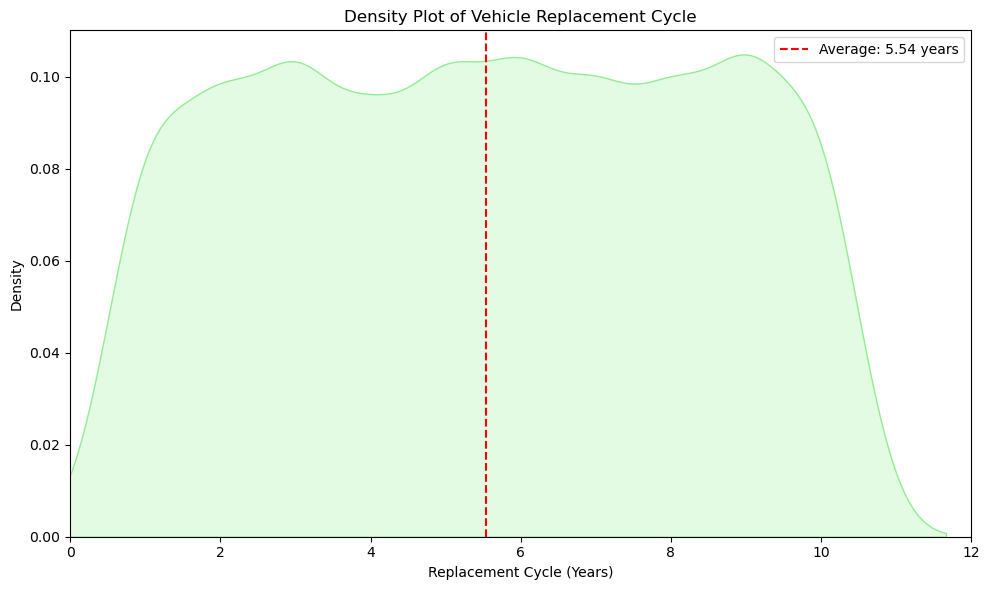

In [105]:
# Creating a figure
plt.figure(figsize=(10, 6))

# Plotting the density plot for 'replacement_cycle_data' utilising the kdeplot function from the Seaborn library (sns)
sns.kdeplot(replacement_cycle_data, color='lightgreen', fill=True)
plt.title('Density Plot of Vehicle Replacement Cycle')
plt.xlabel('Replacement Cycle (Years)')
plt.ylabel('Density')

# Finding the maximum value within 'replacement_cycle_data'
max_replacement_cycle = replacement_cycle_data.max()

# Adding 2 to the maximum replacement cycle found in the data provides padding on the right side of the plot for better aesthetics and readability
plt.xlim(0, max_replacement_cycle + 2)

# Adding a line for the average, with label included to display the average value on the legend with two decimal places
plt.axvline(average_replacement_cycle, color='r', linestyle='--', 
            label=f'Average: {average_replacement_cycle:.2f} years')
plt.legend()
plt.tight_layout()
plt.show()

3. How many customers do they currently have in the WR10 and WR11 postcode areas?
Broken down into:

- Total number of customers in these postcode areas.
- The ages of these customers.
- The total value of the vehicles.
- The average value of the vehicles, accounting for outliers.

Total number of customers in these postcode areas:

In [106]:
# Using .loc to filter rows where 'Postcode' matches 'WR10' or 'WR11'
wr_data = civitas_data.loc[(civitas_data.Postcode == "WR10") | (civitas_data.Postcode == "WR11")]

# Remove duplicate entries based on 'Customer ID' to retain only unique customers
wr_unique_customers = wr_data.drop_duplicates(subset='Customer ID')

# Calculate the total number of unique customers in the filtered data
total_customers = wr_unique_customers['Customer ID'].count()

# Print the result, indicating the total number of customers in 'WR10' and 'WR11'
print(f"There is a total of {total_customers} customers in WR10 and WR11 postcodes.")

There is a total of 180 customers in WR10 and WR11 postcodes.


The ages of these customers:

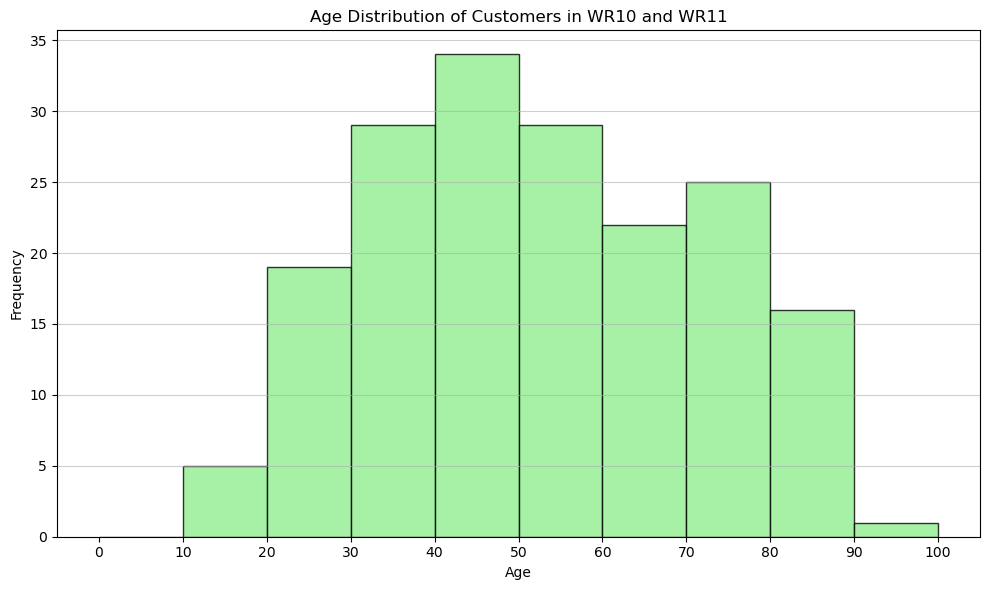

In [107]:
# Plotting a histogram of the 'Age' column from the wr_data
plt.figure(figsize=(10, 6))
plt.hist(wr_unique_customers['Age'], bins=range(0, 101, 10), edgecolor='black', alpha=0.8, color='lightgreen')
plt.title('Age Distribution of Customers in WR10 and WR11')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 10))
plt.grid(axis='y', alpha=0.6)
plt.tight_layout()
plt.show()

The histogram shows that the largest number of customers in the postcodes WR10 and WR11 fall into the 40-50 age range.

The total value of the vehicles:

In [108]:
# Cleaning the 'Retail_Price' and converting it to float for calculations
# Replace all '£' and ',' with '' to remove the characters
wr_data_clean = wr_data['Retail_Price'].replace({'£': '', ',': ''}, regex=True).astype(float)

# Counting and printing the total
total_value = wr_data_clean.sum()
print(f"The total value of the vehicles is £{total_value:.2f}")

The total value of the vehicles is £20757948.00


The average value of the vehicles, accounting for outliers:

In [109]:
# Calculate z-scores for the 'Retail_Price' column
z_scores = stats.zscore(wr_data_clean)

# Define a threshold
threshold = 3

# Filter out outliers
data_without_outliers = wr_data_clean[np.abs(z_scores) <= threshold]

# Display the original and cleaned data sizes
original_size = len(wr_data_clean)
cleaned_size = len(data_without_outliers)

print(f"The original size of the data was: {original_size}.")
print(f"The cleaned size of the data is: {cleaned_size}.")

The original size of the data was: 320.
The cleaned size of the data is: 320.


Utilizing the z-score method with a threshold of 3, our analysis indicates that the data does not contain any outliers. This suggests that our dataset is relatively consistent within this defined range.

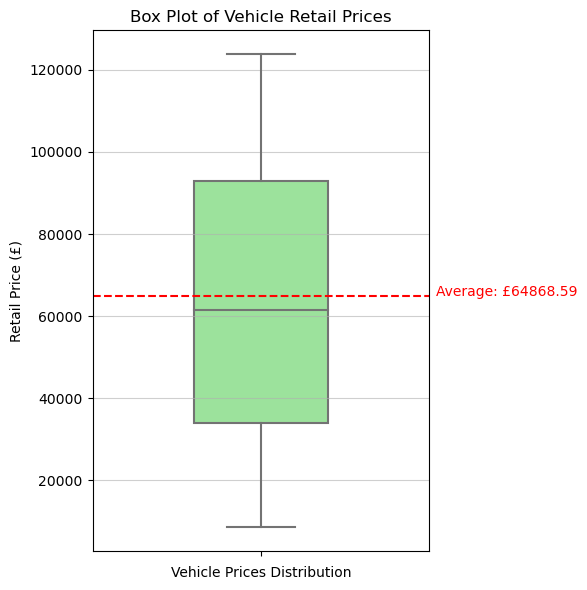

The average value of the vehicles is £64868.59


In [110]:
# Calculating average value
average_value = wr_data_clean.mean()

# Creating the box plot for 'Retail_Price'
plt.figure(figsize=(6, 6))
sns.boxplot(y=wr_data_clean, color='lightgreen', width=0.4)
plt.axhline(average_value, color='r', linestyle='--')
plt.text(0.52, average_value, f"Average: £{average_value:.2f}", color='r')
plt.title('Box Plot of Vehicle Retail Prices')
plt.ylabel('Retail Price (£)')
plt.xlabel('Vehicle Prices Distribution')
plt.grid(axis='y', alpha=0.6)
plt.tight_layout()
plt.show()

# Printing the average
print(f"The average value of the vehicles is £{average_value:.2f}")

4. What is the level of vehicle sales over a fiscal year?

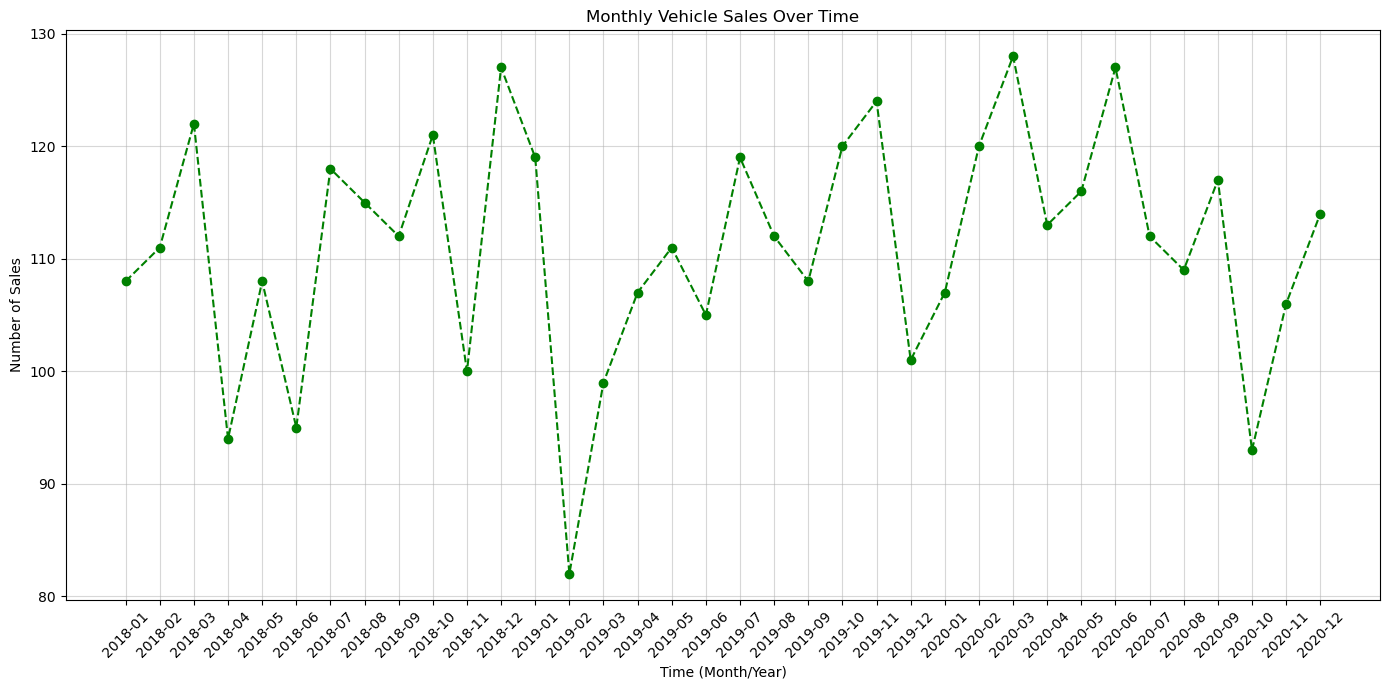

In [111]:
# Convert 'Purchase_Date' to datetime for easier time-series analysis
purchase_dates = pd.to_datetime(civitas_data['Purchase_Date'], dayfirst=True, errors='coerce')

# Extracts year and month from each date and converts the datetime to a period format with a monthly frequency
year_month = purchase_dates.dt.to_period('M')

# Group by month/year and count sales for each period
monthly_sales = civitas_data.groupby(year_month)['Customer ID'].count()

plt.figure(figsize=(14, 7))

# Converts the month/year periods to strings to be used as x-axis labels and provides the sales count for each month/year period
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='--', color='g')
plt.title('Monthly Vehicle Sales Over Time')
plt.xlabel('Time (Month/Year)')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(axis='both', alpha=0.5)
plt.tight_layout()
plt.show()

The above line plot illustrates the monthly sales trend of vehicles across all availble years in the Civitas Motors data.

In [112]:
# Extract the fiscal year based on the purchase date
def assign_fiscal_year(date):
    if (date.month < 4) or (date.month == 4 and date.day < 6):
        return date.year - 1
    else:
        return date.year

# Apply the function to the purchase_dates series
fiscal_years = purchase_dates.apply(assign_fiscal_year)

# Convert the "Retail_Price" column to numeric format
retail_prices = civitas_data['Retail_Price'].replace({'£': '', ',': ''}, regex=True).astype(float)

# Create a new dataframe for the relevant fiscal years and their sales
filtered_data = pd.DataFrame({
    'Fiscal_Year': fiscal_years,
    'Retail_Price': retail_prices
})

# Display data frame for visual check
filtered_data

,Fiscal_Year,Retail_Price
0,2020,85100.0
1,2019,10828.0
2,2017,44671.0
3,2020,85878.0
4,2020,119030.0
...,...,...
3995,2018,80422.0
3996,2018,113528.0
3997,2020,94449.0
3998,2019,114675.0


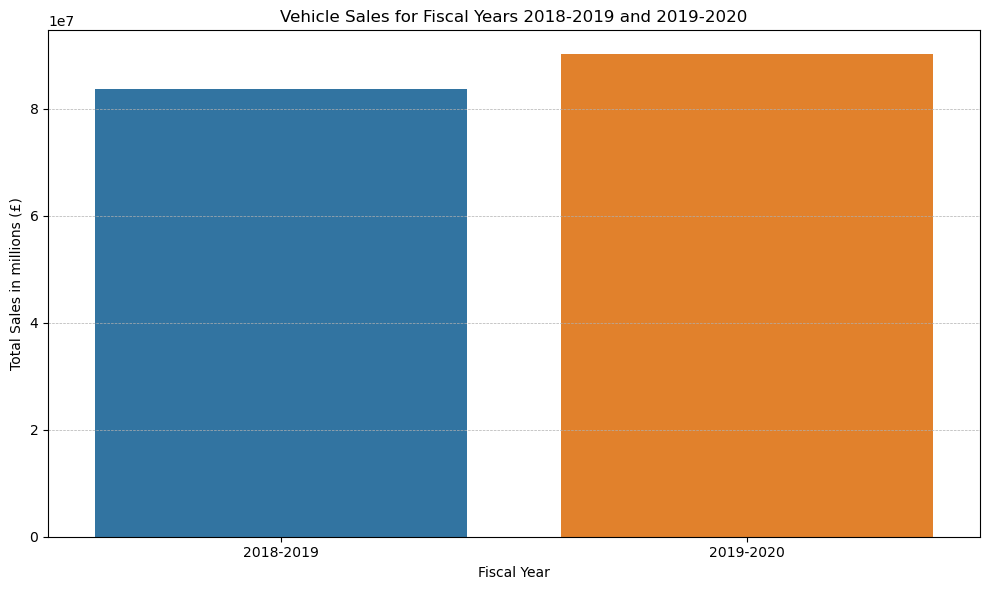

Fiscal_Year
2018    83755023.0
2019    90157183.0
Name: Retail_Price, dtype: float64


In [113]:
# Filter this dataframe for the years 2018 and 2019
fiscal_years_data = filtered_data[(filtered_data['Fiscal_Year'] == 2018) | (filtered_data['Fiscal_Year'] == 2019)]

# Group by fiscal year and sum the sales for visualization
sales_by_fiscal_year = fiscal_years_data.groupby('Fiscal_Year')['Retail_Price'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_fiscal_year.index.astype(str), y=sales_by_fiscal_year.values)
plt.title('Vehicle Sales for Fiscal Years 2018-2019 and 2019-2020')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Sales in millions (£)')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(ticks=[0, 1], labels=['2018-2019', '2019-2020'])
plt.tight_layout()
plt.show()

print(sales_by_fiscal_year)

# Part 2 Marketing Analysis

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [115]:
marketing_data = pd.read_csv('MarketingChannelROI.csv')
marketing_data.head(11)

,Post,Online,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


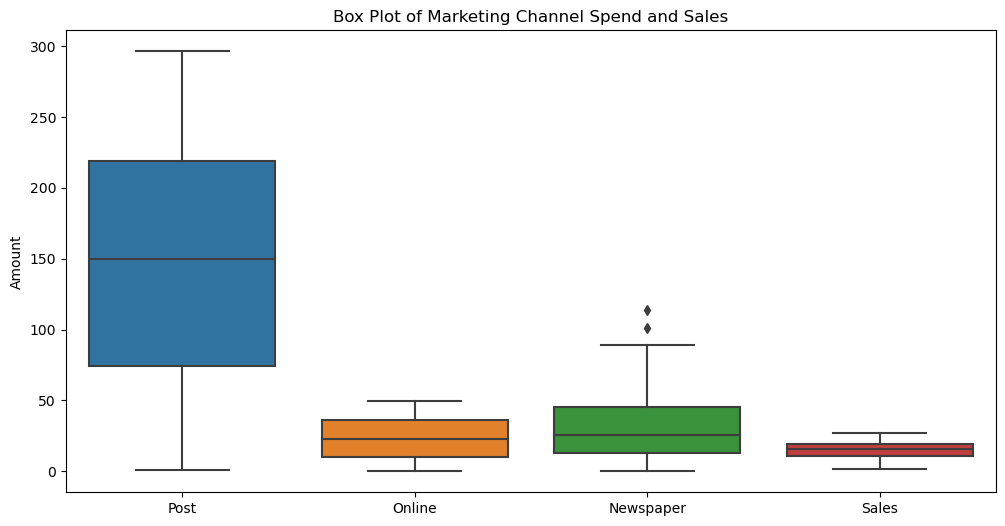

In [116]:
# Create box plots to visualize outliers in the data
plt.figure(figsize=(12, 6))
sns.boxplot(data=marketing_data)
plt.title('Box Plot of Marketing Channel Spend and Sales')
plt.ylabel('Amount')
plt.show()

In [117]:
# Calculate Z-scores of the data
z_scores = stats.zscore(marketing_data)

# Define a threshold for identifying outliers
threshold = 3

# Remove outliers
marketing_data_cleaned = marketing_data[(z_scores.abs() <= threshold).all(axis=1)]

# Check for missing values
missing_values = marketing_data_cleaned.isnull().sum()

# Statistical summary
statistical_summary = marketing_data_cleaned.describe()

missing_values, statistical_summary

(Post         0
 Online       0
 Newspaper    0
 Sales        0
 dtype: int64,
              Post      Online   Newspaper       Sales
 count  198.000000  198.000000  198.000000  198.000000
 mean   146.688384   23.130808   29.777273   15.100000
 std     85.443221   14.862111   20.446303    5.271184
 min      0.700000    0.000000    0.300000    1.600000
 25%     74.800000    9.925000   12.650000   11.000000
 50%    149.750000   22.400000   25.600000   16.000000
 75%    218.475000   36.325000   44.050000   18.975000
 max    293.600000   49.600000   89.400000   27.000000)

Correlation matrix:

In [118]:
# Display the correlation matrix
marketing_data_cleaned.corr()

,Post,Online,Newspaper,Sales
Post,1.000000,0.051978,0.049771,0.899974
Online,0.051978,1.000000,0.346364,0.348566
Newspaper,0.049771,0.346364,1.000000,0.151764
Sales,0.899974,0.348566,0.151764,1.000000


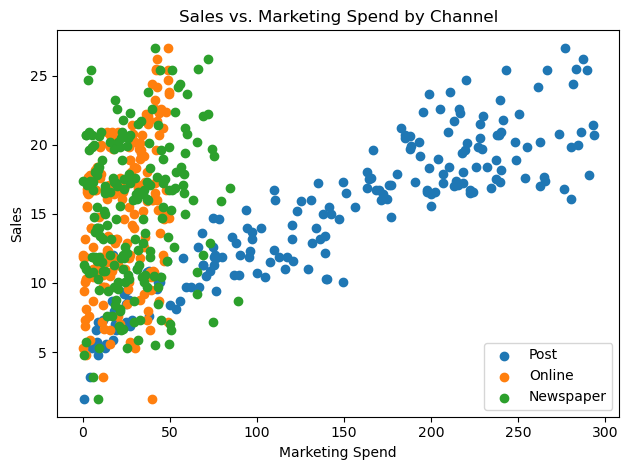

In [119]:
# Prepare the data for linear regression models
# Predictor variables
X_post = marketing_data_cleaned[['Post']]
X_online = marketing_data_cleaned[['Online']]
X_newspaper = marketing_data_cleaned[['Newspaper']]

# Response variable
y_sales = marketing_data_cleaned['Sales']

plt.scatter(X_post,y_sales, label='Post')
plt.scatter(X_online,y_sales, label='Online')
plt.scatter(X_newspaper,y_sales, label='Newspaper')
plt.title('Sales vs. Marketing Spend by Channel')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

Linear Regression:

To visualize the correlations calculated earlier in the correlation matrix, scatter plots for each pair of variables ('Post' vs. 'Sales', 'Online' vs. 'Sales', and 'Newspaper' vs. 'Sales') along with their line of best fit can be created. This will be done by plotting the data points and then plotting a regression line that represents the trend in the data.

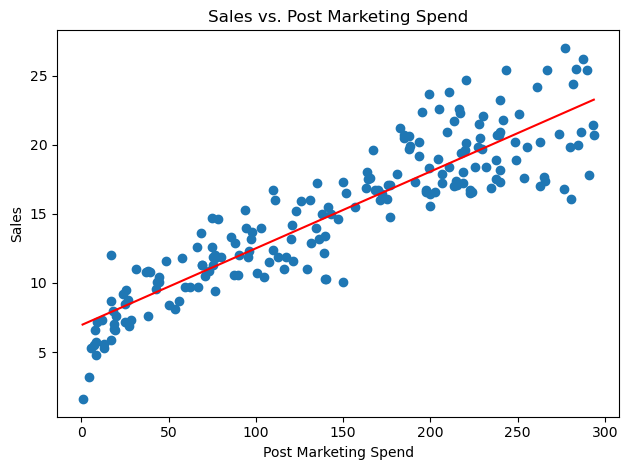

In [120]:
# Define and fit the model
linear_model_post = LinearRegression(fit_intercept=True)
linear_model_post.fit(X_post.values, y_sales)
xfit = np.linspace(X_post.min(), X_post.max(), 1000)
yfit = linear_model_post.predict(xfit)

# Plot the original data and the regression line
plt.scatter(X_post, y_sales)
plt.plot(xfit, yfit, 'r')
plt.xlabel('Post Marketing Spend')
plt.ylabel('Sales')
plt.title('Sales vs. Post Marketing Spend')
plt.tight_layout()
plt.show()

In [121]:
# Reshape the data
X_post = marketing_data_cleaned['Post'].values.reshape(-1,1)
y_sales = marketing_data_cleaned['Sales'].values.reshape(-1,1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_post, y_sales, test_size=0.2, random_state=0)

# Train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Compare actual vs predicted values
df_comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_comparison.head()

,Actual,Predicted
0,14.6,15.018453
1,8.4,9.734753
2,16.0,14.138741
3,16.7,16.261996
4,8.8,8.474920


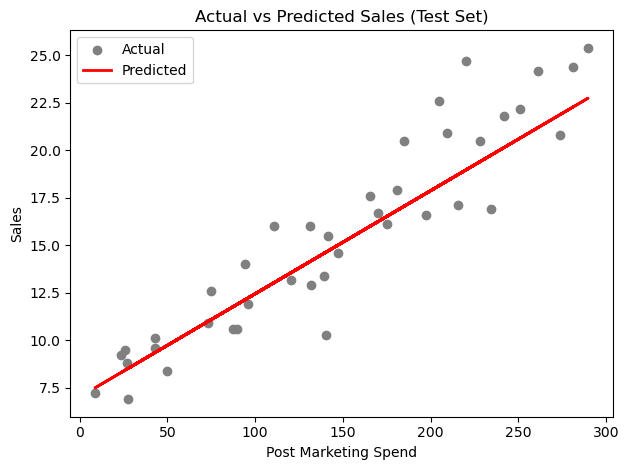

Mean Absolute Error: 1.6078864837474456
Mean Squared Error: 4.1399749306912526
Root Mean Squared Error: 2.034692834481719


In [122]:
# Visualize the actual vs predicted values with a scatter plot and the regression line
plt.scatter(X_test, y_test, color='gray', label='Actual')
plt.plot(X_test, y_pred, color='r', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Post Marketing Spend')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Compute the evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

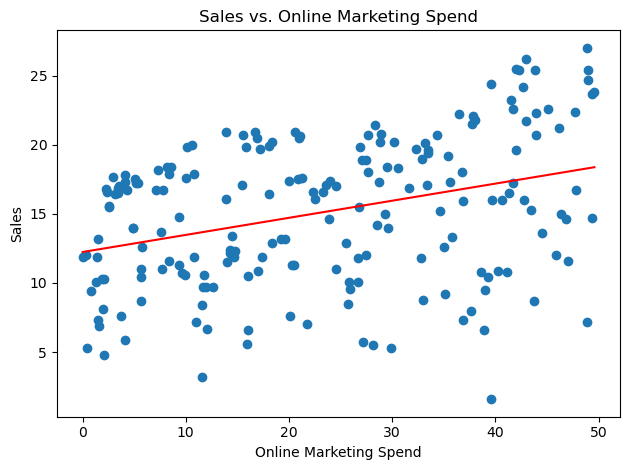

In [123]:
# Define and fit the model
linear_model_online = LinearRegression(fit_intercept=True)
linear_model_online.fit(X_online.values, y_sales)
xfit = np.linspace(X_online.min(), X_online.max(), 1000)
yfit = linear_model_online.predict(xfit)

# Plot the original data and the regression line
plt.scatter(X_online, y_sales)
plt.plot(xfit, yfit, 'r')
plt.xlabel('Online Marketing Spend')
plt.ylabel('Sales')
plt.title('Sales vs. Online Marketing Spend')
plt.tight_layout()
plt.show()

In [124]:
# Reshape the data
X_online = marketing_data_cleaned['Online'].values.reshape(-1,1)
y_sales = marketing_data_cleaned['Sales'].values.reshape(-1,1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_online, y_sales, test_size=0.2, random_state=0)

# Train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Compare actual vs predicted values
df_comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_comparison.head()

,Actual,Predicted
0,14.6,15.131412
1,8.4,13.667730
2,16.0,17.380486
3,16.7,13.215535
4,8.8,16.214300


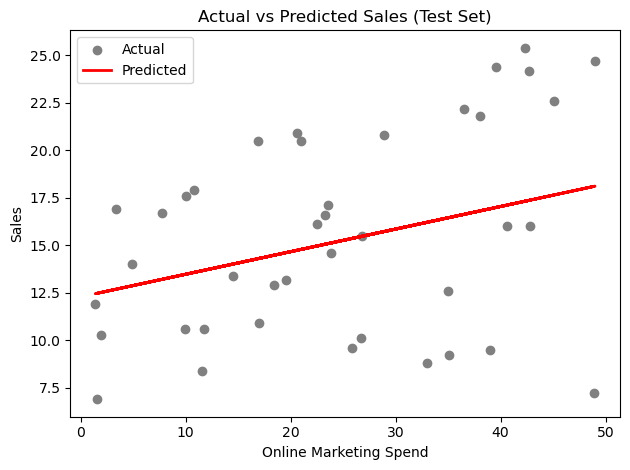

Mean Absolute Error: 4.1785794330506665
Mean Squared Error: 24.007457041862722
Root Mean Squared Error: 4.8997405076047365


In [125]:
# Visualize the actual vs predicted values with a scatter plot and the regression line
plt.scatter(X_test, y_test, color='gray', label='Actual')
plt.plot(X_test, y_pred, color='r', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Online Marketing Spend')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Compute the evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

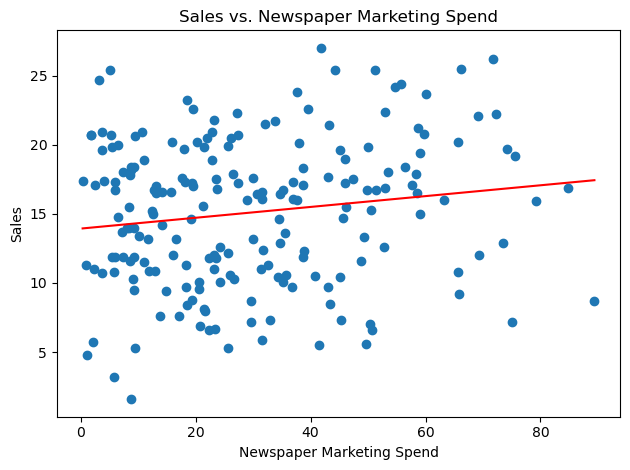

In [126]:
# Define and fit the model
linear_model_newspaper = LinearRegression(fit_intercept=True)
linear_model_newspaper.fit(X_newspaper.values, y_sales)
xfit = np.linspace(X_newspaper.min(), X_newspaper.max(), 1000)
yfit = linear_model_newspaper.predict(xfit)

# Plot the original data and the regression line
plt.scatter(X_newspaper, y_sales)
plt.plot(xfit, yfit, 'r')
plt.xlabel('Newspaper Marketing Spend')
plt.ylabel('Sales')
plt.title('Sales vs. Newspaper Marketing Spend')
plt.tight_layout()
plt.show()

In [127]:
# Reshape the data
X_newspaper = marketing_data_cleaned['Newspaper'].values.reshape(-1,1)
y_sales = marketing_data_cleaned['Sales'].values.reshape(-1,1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_newspaper, y_sales, test_size=0.2, random_state=0)

# Train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Compare actual vs predicted values
df_comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_comparison.head()

,Actual,Predicted
0,14.6,14.641529
1,8.4,14.615643
2,16.0,15.003939
3,16.7,15.236916
4,8.8,14.648926


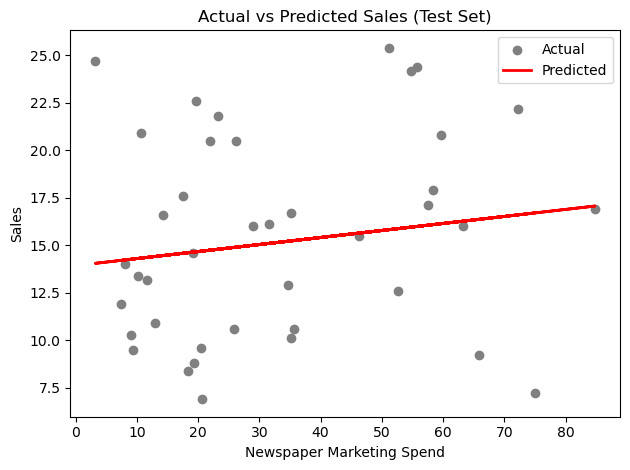

Mean Absolute Error: 4.256328897792786
Mean Squared Error: 27.0233994426657
Root Mean Squared Error: 5.198403547500492


In [128]:
# Visualize the actual vs predicted values with a scatter plot and the regression line
plt.scatter(X_test, y_test, color='gray', label='Actual')
plt.plot(X_test, y_pred, color='r', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Newspaper Marketing Spend')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Compute the evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Multivariate regression:

In [129]:
# Define the features and the target
X_multivariate = marketing_data_cleaned[['Post', 'Online', 'Newspaper']]
y_multivariate = marketing_data_cleaned['Sales']

# Create the model and fit the data
model_multivariate = LinearRegression()
model_multivariate.fit(X_multivariate, y_multivariate)

# Hypothetical marketing spends for prediction
hypothetical_spends = [[2000, 2000, 2000]]

# Make the prediction using the multivariate regression model
sales_prediction = model_multivariate.predict(hypothetical_spends)

print("Sales prediction: ", sales_prediction)

# Coefficients of the model
coefficients = model_multivariate.coef_
print("Coefficiants: ", coefficients)


Sales prediction:  [329.24770737]
Coefficiants:  [0.05454452 0.1069161  0.00086314]


C:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Polynomial Regressions:

In [130]:
# We will apply polynomial regression to each marketing method individually against Sales.
# We'll start by defining the degrees for the polynomial we want to fit. Let's try with a 3rd-degree polynomial first.

# Setting up the data for polynomial regression
X_post = marketing_data_cleaned['Post'].values
X_online = marketing_data_cleaned['Online'].values
X_newspaper = marketing_data_cleaned['Newspaper'].values
y_sales = marketing_data_cleaned['Sales'].values

# Applying polynomial regression for 'Post' marketing spend
model_post = np.poly1d(np.polyfit(X_post, y_sales, 3))

# Generating a line for 'Post' marketing spend
line_post = np.linspace(min(X_post), max(X_post), 100)

# Applying polynomial regression for 'Online' marketing spend
model_online = np.poly1d(np.polyfit(X_online, y_sales, 3))

# Generating a line for 'Online' marketing spend
line_online = np.linspace(min(X_online), max(X_online), 100)

# Applying polynomial regression for 'Newspaper' marketing spend
model_newspaper = np.poly1d(np.polyfit(X_newspaper, y_sales, 3))

# Generating a line for 'Newspaper' marketing spend
line_newspaper = np.linspace(min(X_newspaper), max(X_newspaper), 100)

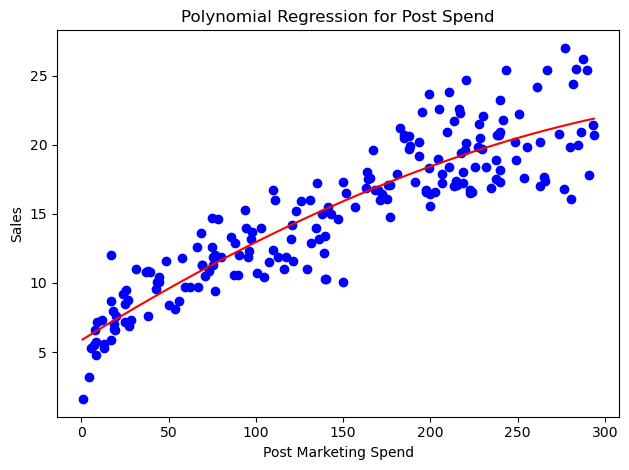

In [131]:
# 'Post' Spend Plot
plt.scatter(X_post, y_sales, color='blue')
plt.plot(line_post, model_post(line_post), color='red')
plt.title('Polynomial Regression for Post Spend')
plt.xlabel('Post Marketing Spend')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

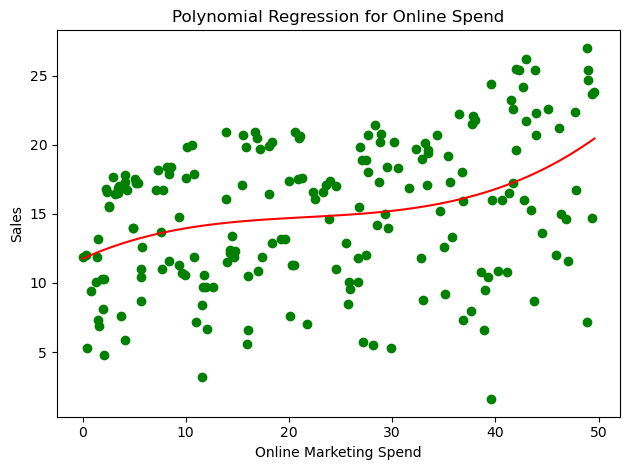

In [132]:
# 'Online' Spend Plot
plt.scatter(X_online, y_sales, color='green')
plt.plot(line_online, model_online(line_online), color='red')
plt.title('Polynomial Regression for Online Spend')
plt.xlabel('Online Marketing Spend')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

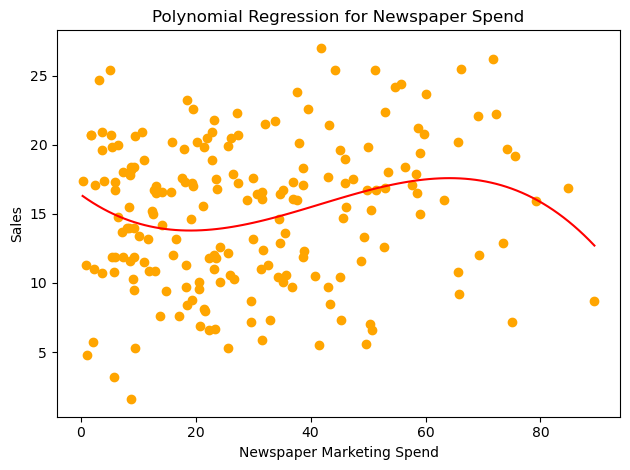

In [133]:
# 'Newspaper' Spend Plot
plt.scatter(X_newspaper, y_sales, color='orange')
plt.plot(line_newspaper, model_newspaper(line_newspaper), color='red')
plt.title('Polynomial Regression for Newspaper Spend')
plt.xlabel('Newspaper Marketing Spend')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

In [134]:
from sklearn.metrics import r2_score

# Calculating the R-squared value for each polynomial regression
r_squared_post = r2_score(y_sales, model_post(X_post))
r_squared_online = r2_score(y_sales, model_online(X_online))
r_squared_newspaper = r2_score(y_sales, model_newspaper(X_newspaper))

# Print each R-squared value
print(f"R-squared for 'Post' Spend Model: {r_squared_post}")
print(f"R-squared for 'Online' Spend Model: {r_squared_online}")
print(f"R-squared for 'Newspaper' Spend Model: {r_squared_newspaper}")

R-squared for 'Post' Spend Model: 0.8208843275999294
R-squared for 'Online' Spend Model: 0.13438467337975146
R-squared for 'Newspaper' Spend Model: 0.05338916902546875
